# Riemann Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir            # library that reads data produced by ET
from kuibit.grid_data import UniformGrid

## Exact Solution

In [2]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

In [3]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

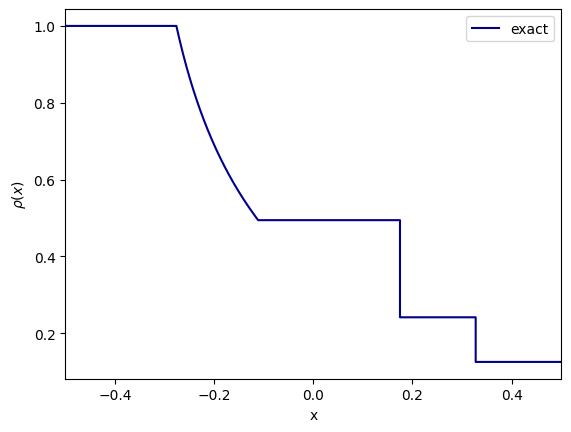

In [4]:
plt.plot(x_exact, rho_exact, color='darkblue', label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')
#plt.savefig('./images/Sod_exact.png',dpi=200)
plt.show()

## Read the Numerical Results

In [202]:
N = 1000
n2 = int(N/2)

In [203]:
gf= SimDir("./Sod_1d_1000/").gf
print(gf)


Available grid data of dimension 1D (x): 
['w_lorentz', 'vel[2]', 'eps', 'dens', 'scon[1]', 'rho', 'scon[2]', 'tau', 'press', 'scon[0]', 'vel[1]', 'vel[0]']


Available grid data of dimension 1D (y): 
['vel[1]', 'scon[2]', 'dens', 'vel[2]', 'tau', 'scon[0]', 'vel[0]', 'rho', 'scon[1]', 'w_lorentz', 'press', 'eps']


Available grid data of dimension 1D (z): 
['press', 'dens', 'scon[0]', 'eps', 'vel[1]', 'scon[1]', 'tau', 'rho', 'vel[0]', 'scon[2]', 'vel[2]', 'w_lorentz']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [204]:
vars1d=gf.x
print(vars1d)


Available grid data of dimension 1D (x): 
['w_lorentz', 'vel[2]', 'eps', 'dens', 'scon[1]', 'rho', 'scon[2]', 'tau', 'press', 'scon[0]', 'vel[1]', 'vel[0]']



In [205]:
rho=vars1d.fields.rho

press=vars1d.fields.press

vx=vars1d.fields.vel[0]
vy=vars1d.fields.vel[1]
vz=vars1d.fields.vel[2]

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [206]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])

In [207]:
print(rho.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


In [42]:
rho_final = rho.read_on_grid(n2, small_grid)

In [43]:
print(*rho_final.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

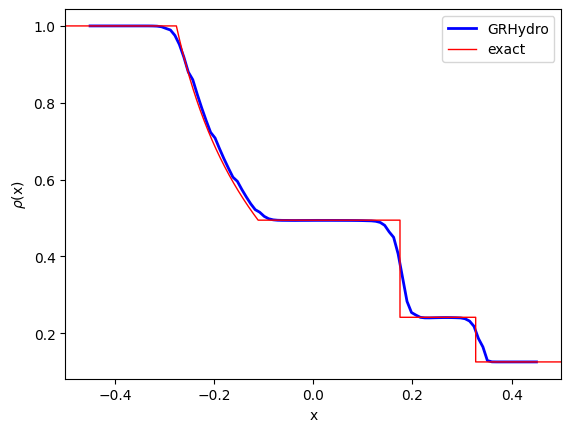

In [47]:
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, color='b', linewidth=2, label="GRHydro")
plt.plot(x_exact, rho_exact, color='r', linewidth=1, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$\rho$(x)')
#plt.savefig('./images/Sod_200st.png',dpi=200)
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

In [38]:
#[iterazione][refinement level][component number]
#rho[0][0][0].data

### Final solution

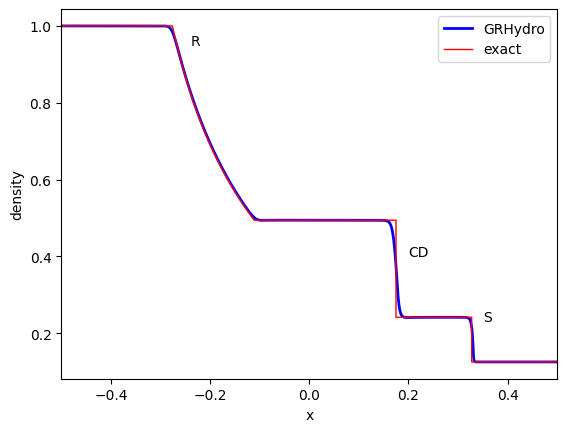

1000


In [221]:
it = n2
plt.plot(rho[it][0][0].coordinates()[0].data,rho[it][0][0].data, label="GRHydro", linewidth=2, color='b')
plt.plot(x_exact, rho_exact, color='r', linewidth=1, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('density')
#plt.savefig('./images/Sod400_rho.png',dpi=120)
plt.show()
print(N)

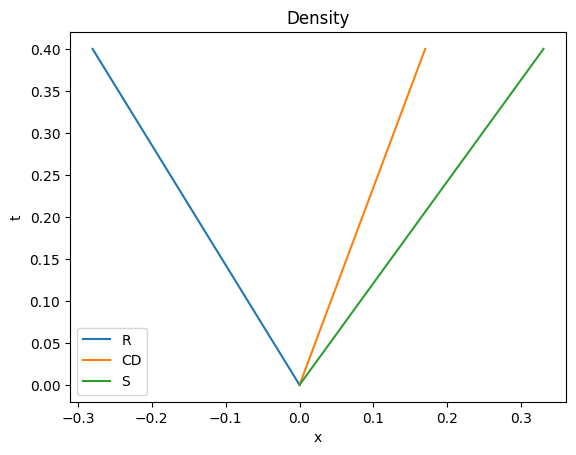

In [212]:
disc = [-0.28, 0.17, 0.33]
plt.plot([0,disc[0]],[0,0.4],label='R')
plt.plot([0,disc[1]],[0,0.4],label='CD')
plt.plot([0,disc[2]],[0,0.4],label='S')
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.title('Density')
#plt.savefig('./images/Sod_charact.png',dpi=120)
plt.show()

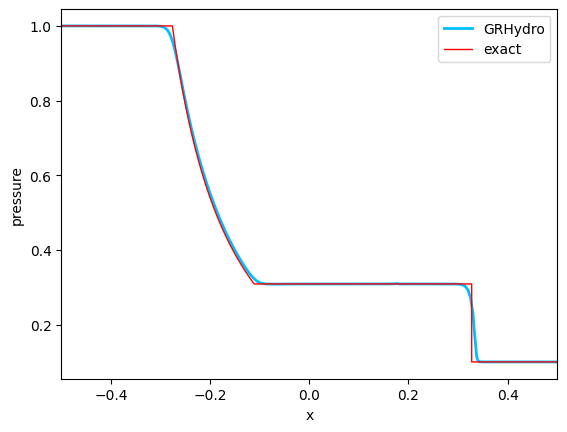

In [144]:
it = n2
plt.plot(press[it][0][0].coordinates()[0].data,press[it][0][0].data, label="GRHydro", linewidth=2, color='deepskyblue')
plt.plot(x_exact, press_exact, color='r', linewidth=1, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('pressure')
#plt.savefig('./images/Sod400_press.png',dpi=120)
plt.show()
print(N)

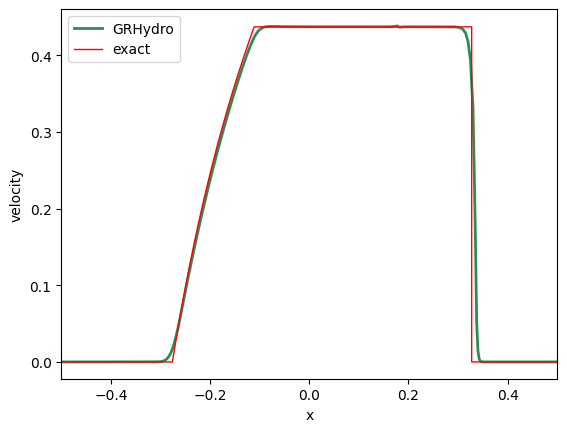

In [145]:
it = n2
plt.plot(vx[it][0][0].coordinates()[0].data,vx[it][0][0].data, label="GRHydro", linewidth=2, color='seagreen')
#plt.plot(vy[it][0][0].coordinates()[0].data,vy[it][0][0].data, label="GRHydro", linewidth=3, color='y')
#plt.plot(vz[it][0][0].coordinates()[0].data,vz[it][0][0].data, label="GRHydro", linewidth=3, color='k')

plt.plot(x_exact, vx_exact, color='r', linewidth=1, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('velocity')
#plt.savefig('./images/Sod400_vel.png',dpi=120)
plt.show()
print(N)

In [138]:
coord_200 = np.copy(vx[it][0][0].coordinates()[0].data)
rho_200 = np.copy(rho[it][0][0].data)
press_200 = np.copy(press[it][0][0].data)
vx_200 = np.copy(vx[it][0][0].data)

In [146]:
coord_400 = np.copy(vx[it][0][0].coordinates()[0].data)
rho_400 = np.copy(rho[it][0][0].data)
press_400 = np.copy(press[it][0][0].data)
vx_400 = np.copy(vx[it][0][0].data)

In [129]:
coord_1000 = np.copy(vx[it][0][0].coordinates()[0].data)
rho_1000 = np.copy(rho[it][0][0].data)
press_1000 = np.copy(press[it][0][0].data)
vx_1000 = np.copy(vx[it][0][0].data)

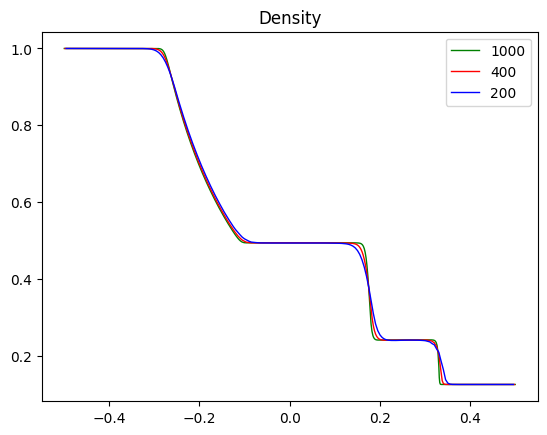

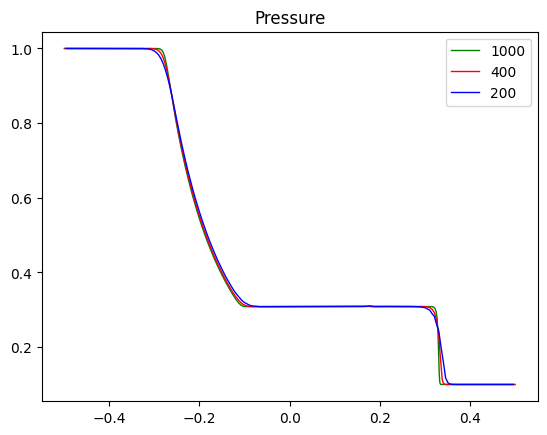

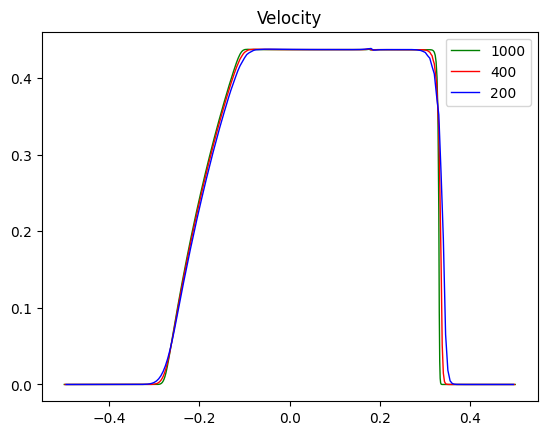

In [159]:
plt.plot(coord_1000,rho_1000,linewidth=1,color='g',label='1000')
plt.plot(coord_400,rho_400, linewidth=1,color='r',label='400')
plt.plot(coord_200,rho_200, linewidth=1,color='b',label='200')
plt.title('Density')
#plt.savefig('./images/Sod_compare_rho.png',dpi=150)
plt.legend()
plt.show()

plt.plot(coord_1000,press_1000, linewidth=1,color='g',label='1000')
plt.plot(coord_400,press_400, linewidth=1,color='r',label='400')
plt.plot(coord_200,press_200, linewidth=1,color='b',label='200')
plt.title('Pressure')
#plt.savefig('./images/Sod_compare_press.png',dpi=150)
plt.legend()
plt.show()

plt.plot(coord_1000,vx_1000, linewidth=1,color='g',label='1000')
plt.plot(coord_400,vx_400, linewidth=1,color='r',label='400')
plt.plot(coord_200,vx_200, linewidth=1,color='b',label='200')
plt.title('Velocity')
#plt.savefig('./images/Sod_compare_vel.png',dpi=150)
plt.legend()
plt.show()

### Time evolution

Text(0.5, 1.0, 'Velocity')

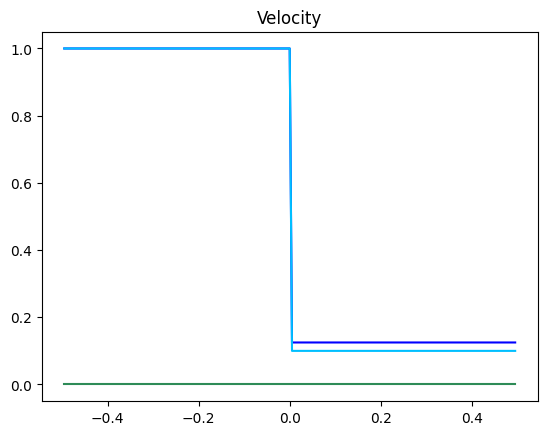

In [51]:
# INITIAL
plt.plot(rho[0][0][0].coordinates()[0].data,rho[0][0][0].data, color='b')
plt.title('Density')
#plt.savefig('./images/Sod_initial_rho.png',dpi=100)
plt.show()

plt.plot(press[0][0][0].coordinates()[0].data,press[0][0][0].data, color='deepskyblue')
plt.title('Pressure')
#plt.savefig('./images/Sod_initial_press.png',dpi=100)
plt.show()

plt.plot(vx[0][0][0].coordinates()[0].data,vx[0][0][0].data, color='seagreen')
plt.title('Velocity')
#plt.savefig('./images/Sod_initial_vel.png',dpi=100)
plt.show()

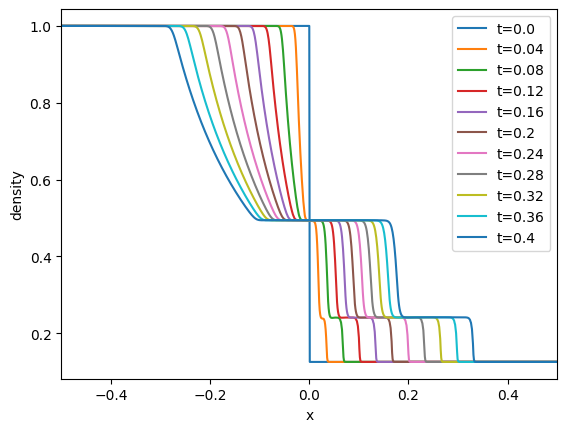

In [224]:
for it in rho.iterations:
    if it%50==0:
        plt.plot(rho[it][0][0].coordinates()[0].data,rho[it][0][0].data, label='t='+str(0.4*it/n2))
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('density')
#plt.savefig('./images/Sod_time_rho.png',dpi=150)
plt.show()

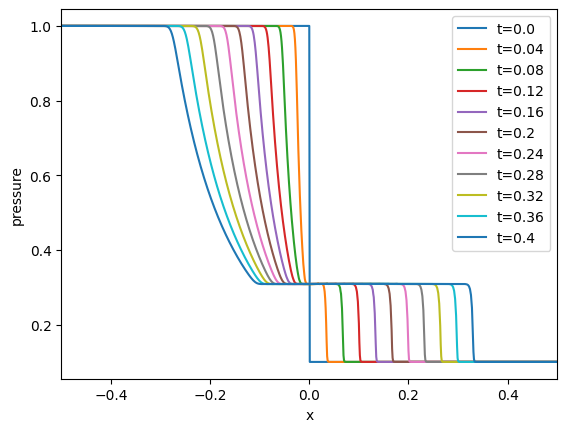

In [223]:
for it in press.iterations:
    if it%50==0:
        plt.plot(press[it][0][0].coordinates()[0].data,press[it][0][0].data, label='t='+str(0.4*it/n2))
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('pressure')
#plt.savefig('./images/Sod_time_press.png',dpi=150)
plt.show()

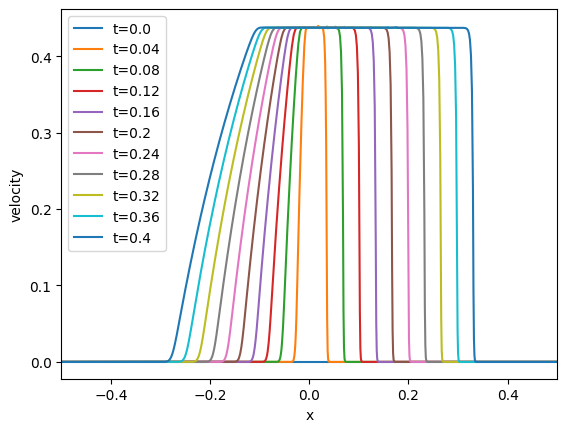

In [222]:
for it in vx.iterations:
    if it%50==0:
        plt.plot(vx[it][0][0].coordinates()[0].data,vx[it][0][0].data, label='t='+str(0.4*it/n2))
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('velocity')
#plt.savefig('./images/Sod_time_vel.png',dpi=150)
plt.show()